# Exploratory Data Analysis - EDA

In [5]:
# Python Version
from platform import python_version
print('Python version: ', python_version())

Python version:  3.9.16


In [6]:
# Imports

## Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Statistics
from scipy import stats

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [7]:
# Package versions
%reload_ext watermark
%watermark -a "Cézar Mendes" --iversions

Author: Cézar Mendes

pandas    : 1.5.3
numpy     : 1.24.3
scipy     : 1.10.1
seaborn   : 0.12.2
sys       : 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
matplotlib: 3.7.1



## Loading Data

In [8]:
df = pd.read_csv('../data/credit_risk_dataset-clean.csv')

In [9]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31529 entries, 0 to 31528
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31529 non-null  int64  
 1   person_income               31529 non-null  int64  
 2   person_home_ownership       31529 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 31529 non-null  object 
 5   loan_grade                  31529 non-null  object 
 6   loan_amnt                   31529 non-null  int64  
 7   loan_int_rate               31529 non-null  float64
 8   loan_status                 31529 non-null  int64  
 9   loan_percent_income         31529 non-null  float64
 10  cb_person_default_on_file   31529 non-null  object 
 11  cb_person_cred_hist_length  31529 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.9+ MB


## Frequency Table

In [10]:
def frequency_table(dataframe, columns):
    freq_table = pd.DataFrame()
    
    for col in columns:
        # Calculate absolute frequency
        freq_abs = dataframe[col].value_counts()
        
        # Calculate relative frequency
        freq_rel = freq_abs / len(dataframe[col])
        
        # Calculate relative frequency percentage
        freq_rel_perc = freq_rel * 100
        
        # Create frequency table for the current column
        col_table = pd.concat([freq_abs, freq_rel, freq_rel_perc], axis=1)
        col_table.columns = ['Frequency Absolute', 'Frequency Relative', 'Frequency Relative (%)']
        
        # Add the current column's frequency table to the overall frequency table
        freq_table = pd.concat([freq_table, col_table])
        
    # Reset index to turn the unique values into a column
    freq_table.reset_index(inplace=True)
    
    # Rename the column holding the unique values
    freq_table.rename(columns={'index': 'Unique Values'}, inplace=True)
    
    # Add column labels to the frequency table
    freq_table['Column'] = [col for col in columns for _ in range(len(dataframe[col].value_counts()))]
    freq_table.set_index(['Column', 'Unique Values'], inplace=True)
    
    return freq_table

In [15]:
cate_list = df.select_dtypes(['object']).columns.tolist()
cate_list

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [16]:
frequency_table(df, df[cate_list])

Frequency Absolute  \
Column                    Unique Values                           
person_home_ownership     RENT                            16011   
                          MORTGAGE                        13021   
                          OWN                              2391   
                          OTHER                             106   
loan_intent               EDUCATION                        6248   
                          MEDICAL                          5869   
                          VENTURE                          5521   
                          PERSONAL                         5348   
                          DEBTCONSOLIDATION                5044   
                          HOMEIMPROVEMENT                  3499   
loan_grade                A                               10301   
                          B                               10124   
                          C                                6303   
                          D                                3550   
                          E                                 951   
                          F                                 236   
                          G                                  64   
cb_person_default_on_file N                               25914   
                          Y                                5615   

                                             Frequency Relative  \
Column                    Unique Values                           
person_home_ownership     RENT                         0.507818   
                          MORTGAGE                     0.412985   
                          OWN                          0.075835   
                          OTHER                        0.003362   
loan_intent               EDUCATION                    0.198167   
                          MEDICAL                      0.186146   
                          VENTURE                      0.175109   
                          PERSONAL                     0.169622   
                          DEBTCONSOLIDATION            0.159980   
                          HOMEIMPROVEMENT              0.110977   
loan_grade                A                            0.326715   
                          B                            0.321101   
                          C                            0.199911   
                          D                            0.112595   
                          E                            0.030163   
                          F                            0.007485   
                          G                            0.002030   
cb_person_default_on_file N                            0.821910   
                          Y                            0.178090   

                                             Frequency Relative (%)  
Column                    Unique Values                              
person_home_ownership     RENT                            50.781820  
                          MORTGAGE                        41.298487  
                          OWN                              7.583495  
                          OTHER                            0.336198  
loan_intent               EDUCATION                       19.816677  
                          MEDICAL                         18.614609  
                          VENTURE                         17.510863  
                          PERSONAL                        16.962162  
                          DEBTCONSOLIDATION               15.997970  
                          HOMEIMPROVEMENT                 11.097720  
loan_grade                A                               32.671509  
                          B                               32.110121  
                          C                               19.991119  
                          D                               11.259475  
                          E                                3.016271  
                          F            

## Summary

In [17]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [21]:
num_list = df.select_dtypes(['float64', 'int64']).drop(columns = 'loan_status').columns.tolist()
num_list

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [22]:
# Describe
def count_outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   out = ((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).sum()
   return out

# Skew
def calc_skew(df):
    return [df[col].skew() for col in df]

# Summary Table
def getOverview(df):
    min = df.min()
    Q1 = df.quantile(0.25)
    mean = np.mean(df)
    median = df.quantile(0.5)
    Q3 = df.quantile(0.75)
    max = df.max()
    IQR = Q3 - Q1
    skew = calc_skew(df)
    outliers = count_outliers(df)
    cut_off = IQR * 1.5
    lower, upper = Q1 - cut_off, Q3 + cut_off
        
    new_columns = ['Columns name', 'Min', 'Q1','Mean', 'Median', 'Q3', 'Max', 'IQR', 'Lower fence', 'Upper fence', 'Skew', 'Num_Outliers']   
    data = zip([column for column in df], min, Q1, mean,  median, Q3, max, IQR, lower, upper, skew, outliers)
    new_df = pd.DataFrame(data = data, columns = new_columns)    
    new_df.set_index('Columns name', inplace = True)
    \
    return new_df.sort_values('Num_Outliers', ascending = False).transpose()

getOverview(df[num_list]).round(2)

Columns name,loan_amnt,person_income,person_age,cb_person_cred_hist_length,person_emp_length,loan_percent_income,loan_int_rate
Min,500.00,4000.00,20.00,2.00,0.00,0.00,5.42
Q1,5000.00,39456.00,23.00,3.00,2.00,0.09,8.49
Mean,9665.15,66704.47,27.76,5.82,4.79,0.17,11.04
Median,8000.00,56000.00,26.00,4.00,4.00,0.15,10.99
Q3,12500.00,80000.00,30.00,8.00,7.00,0.23,13.16
Max,35000.00,6000000.00,144.00,30.00,123.00,0.83,23.22
IQR,7500.00,40544.00,7.00,5.00,5.00,0.14,4.67
Lower fence,-6250.00,-21360.00,12.50,-4.50,-5.50,-0.12,1.49
Upper fence,23750.00,140816.00,40.50,15.50,14.50,0.44,20.16
Skew,1.18,33.11,2.60,1.67,2.62,1.07,0.22


## Visualizations

### Age

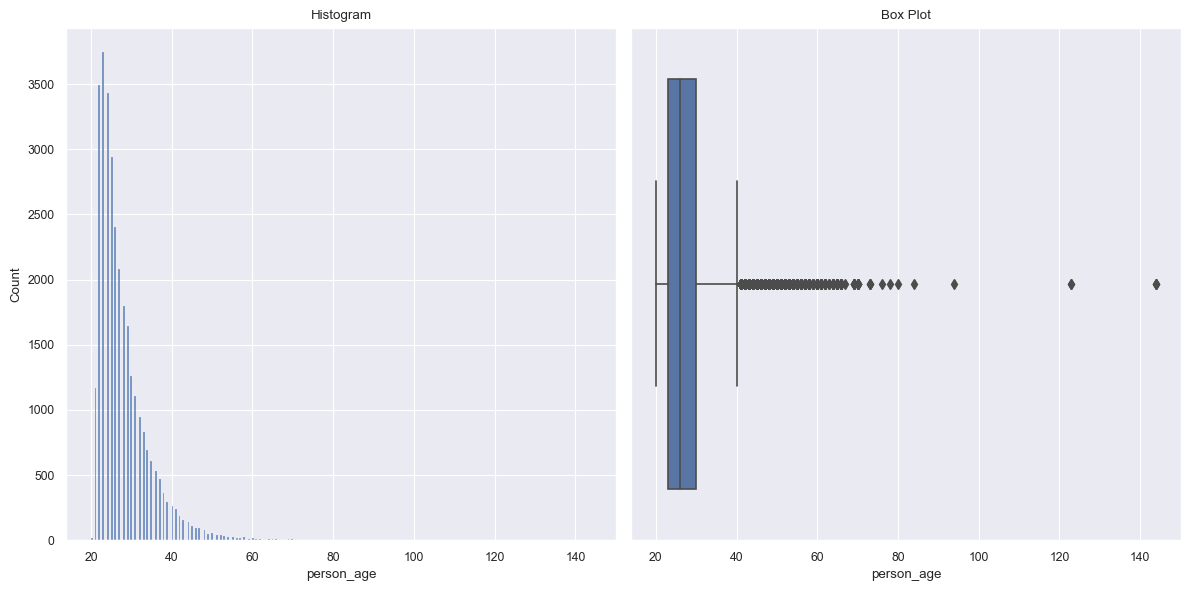

In [24]:
# Plot - Age
sns.set_theme(style="darkgrid")
sns.set_context('paper')

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram 
sns.histplot(data=df, x='person_age', ax=ax1)
ax1.set_title('Histogram')

# Plot box plot 
sns.boxplot(data=df, x='person_age', ax=ax2)
ax2.set_title('Box Plot')

# Adjust spacing between subplots
plt.tight_layout()


plt.show()

### Loan Amount

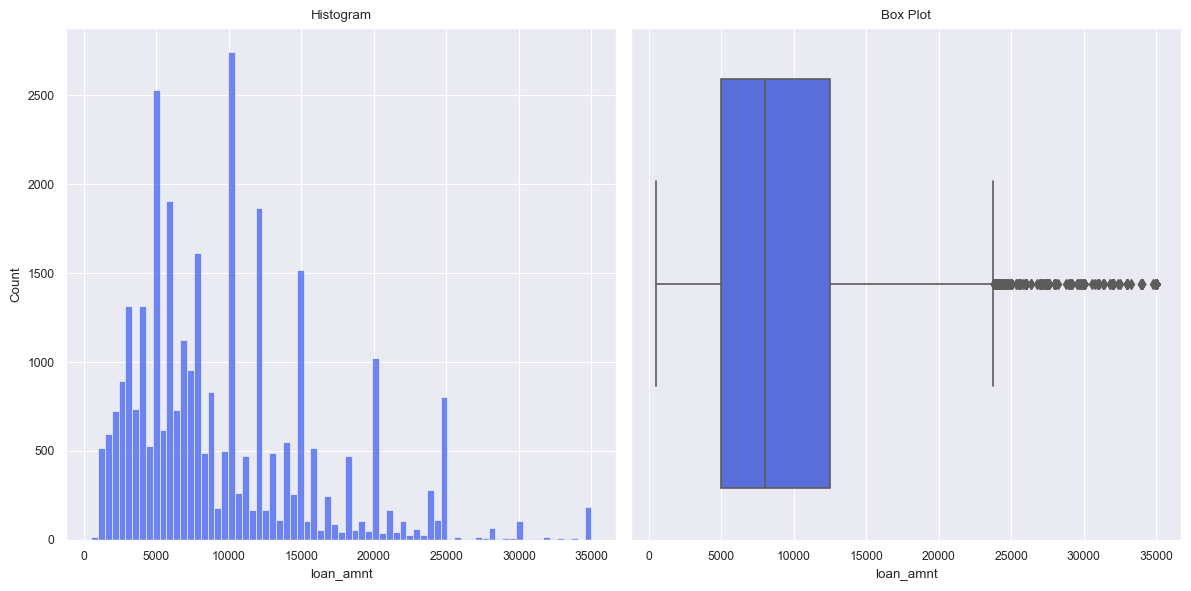

In [25]:
# Plot -  Loan Amount
sns.set_theme(style="darkgrid")
sns.set_context('paper')

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram 
sns.histplot(data=df, x='loan_amnt', ax=ax1, color = "#4361EE")
ax1.set_title('Histogram')

# Plot box plot 
sns.boxplot(data=df, x='loan_amnt', ax=ax2, color = "#4361EE")
ax2.set_title('Box Plot')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

### Annual Income

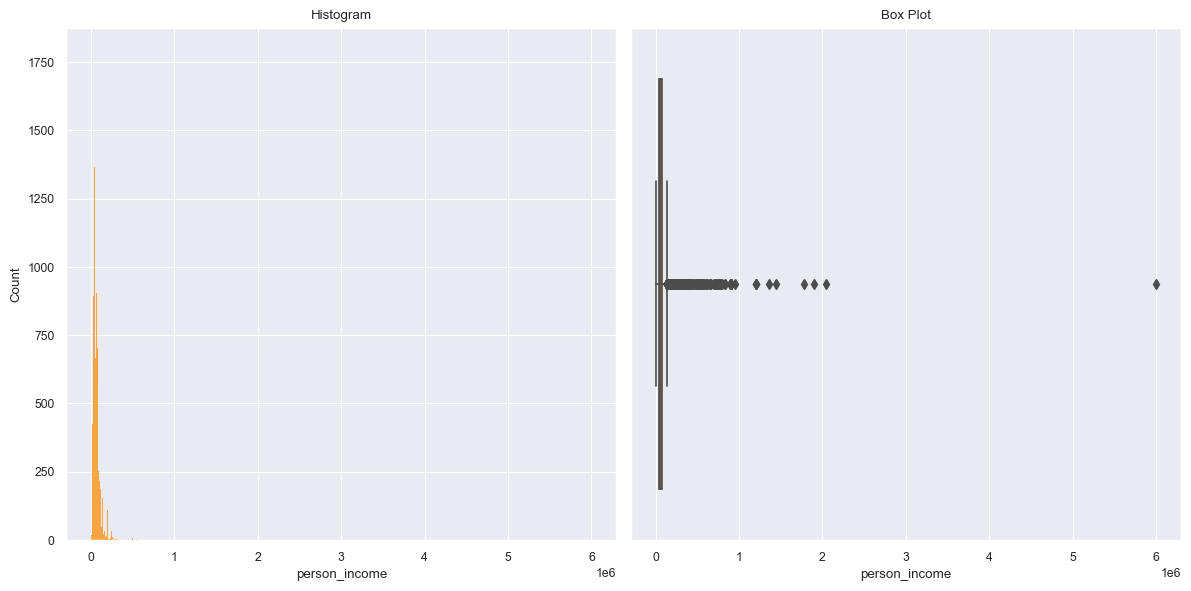

In [32]:
# Plot - person_income
sns.set_theme(style="darkgrid")
sns.set_context('paper')
# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram 
sns.histplot(data=df, x='person_income', ax=ax1, color = "darkorange") #, bins = 100)
ax1.set_title('Histogram')

# Plot box plot 
sns.boxplot(data=df, x='person_income', ax=ax2, color = "darkorange")
ax2.set_title('Box Plot')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

### Credit history length

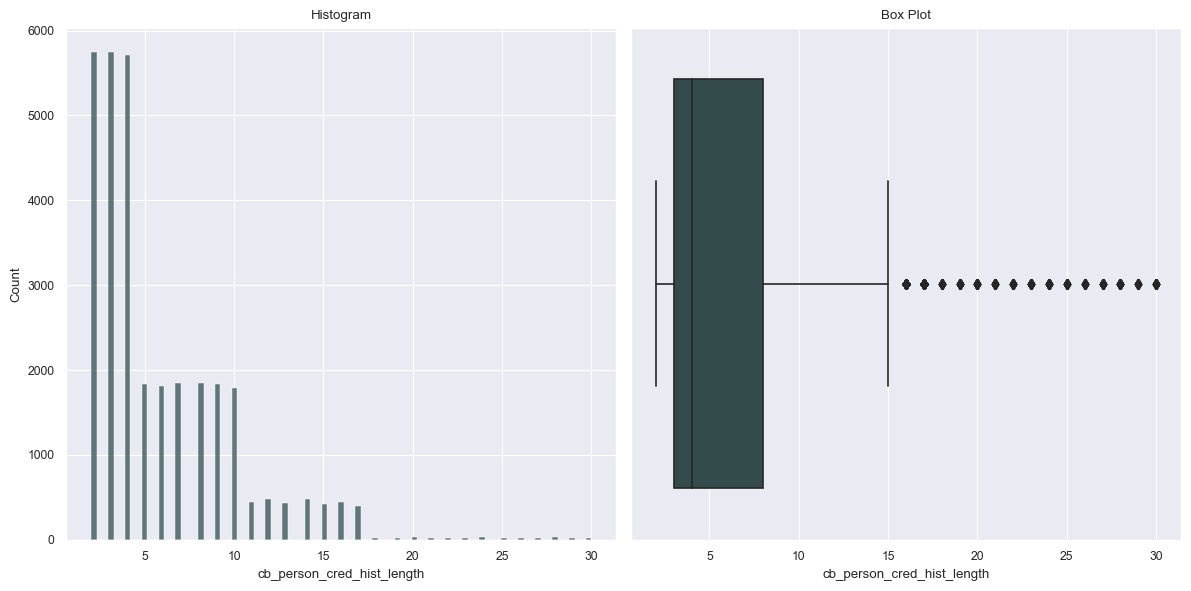

In [33]:
# Plot - cb_person_cred_hist_length
sns.set_theme(style="darkgrid")
sns.set_context('paper')

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram 
sns.histplot(data=df, x='cb_person_cred_hist_length', ax=ax1, color = "darkslategrey")
ax1.set_title('Histogram')

# Plot box plot 
sns.boxplot(data=df, x='cb_person_cred_hist_length', ax=ax2, color = "darkslategrey")
ax2.set_title('Box Plot')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

### Employment length (in years)

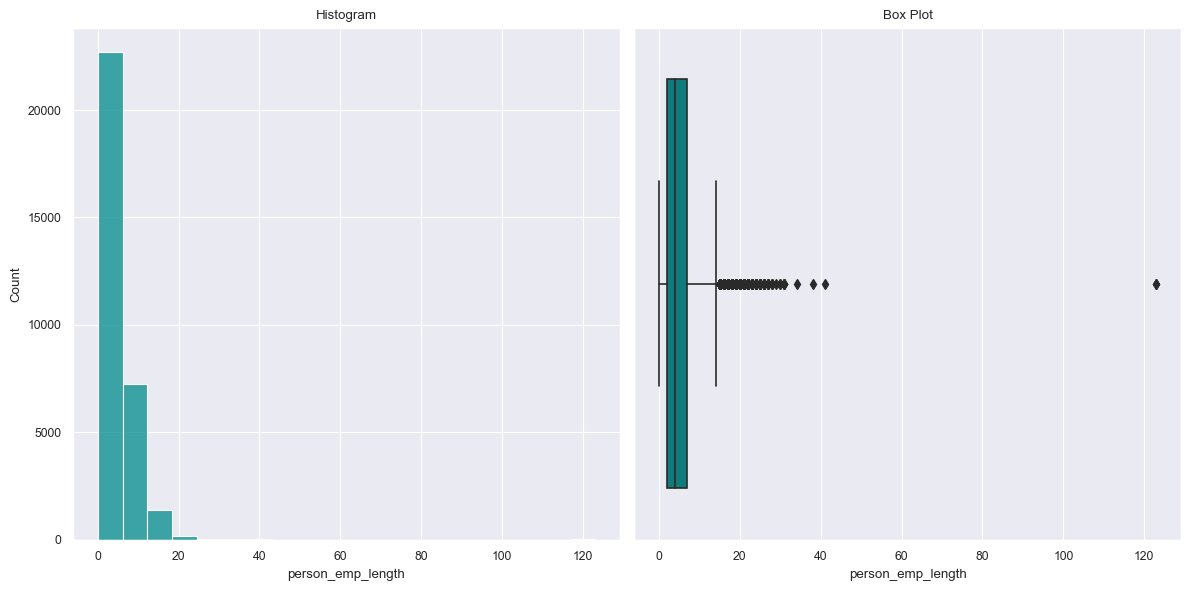

In [37]:
# Plot - person_emp_length
sns.set_theme(style="darkgrid")
sns.set_context('paper')

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram 
sns.histplot(data=df, x='person_emp_length', ax=ax1, color = "darkcyan", bins = 20)
ax1.set_title('Histogram')

# Plot box plot 
sns.boxplot(data=df, x='person_emp_length', ax=ax2, color = "darkcyan")
ax2.set_title('Box Plot')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

### Percent income

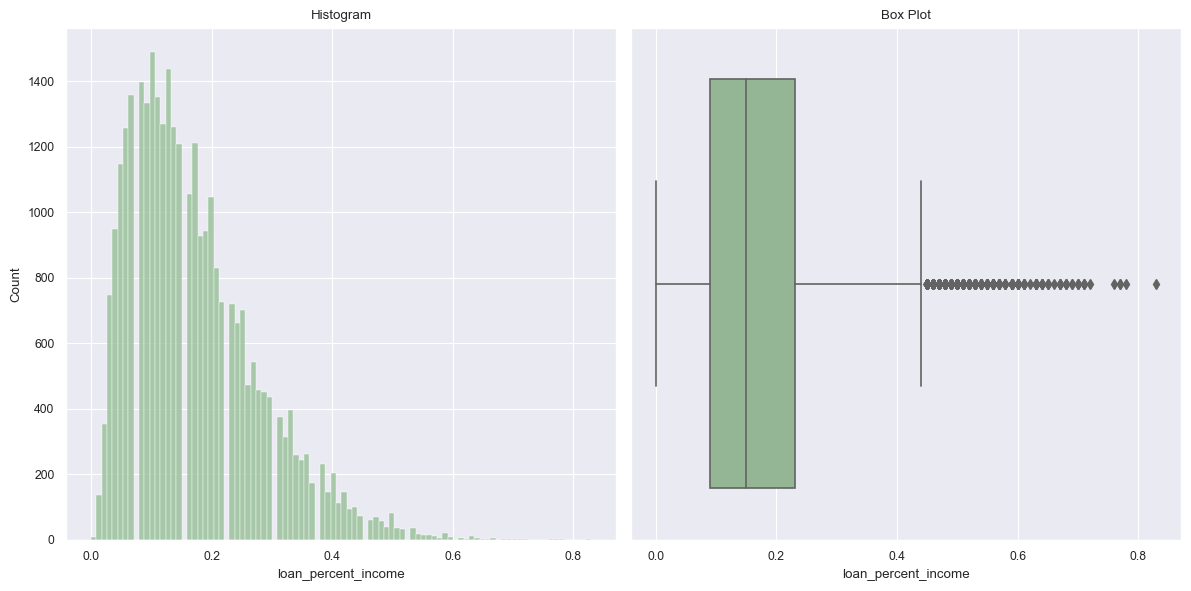

In [38]:
# Plot - loan_percent_income
sns.set_theme(style="darkgrid")
sns.set_context('paper')

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram 
sns.histplot(data=df, x='loan_percent_income', ax=ax1, color = "darkseagreen")
ax1.set_title('Histogram')

# Plot box plot 
sns.boxplot(data=df, x='loan_percent_income', ax=ax2, color = "darkseagreen")
ax2.set_title('Box Plot')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

### Interest rate

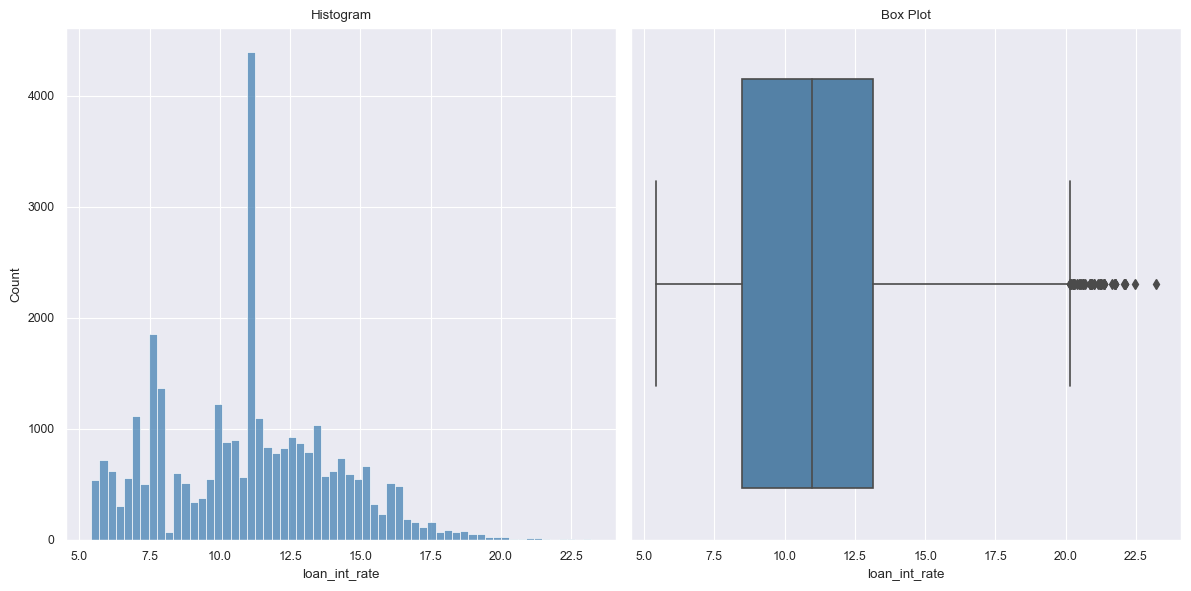

In [40]:
# Plot - loan_int_rate
sns.set_theme(style="darkgrid")
sns.set_context('paper')

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram 
sns.histplot(data=df, x='loan_int_rate', ax=ax1, color = "steelblue")
ax1.set_title('Histogram')

# Plot box plot 
sns.boxplot(data=df, x='loan_int_rate', ax=ax2, color = "steelblue")
ax2.set_title('Box Plot')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()